# EDA & DATA PREPROCESSING

- 

### Import Libraries 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_curve, auc
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from bs4 import BeautifulSoup

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

import pickle

from tqdm import tqdm
import os     

[nltk_data] Downloading package wordnet to /root/nltk_data...


### Import Drive and load Data

In [2]:
Base_path ='/content/drive/MyDrive/Data/RS2'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load Interactions and Recipe Data

In [4]:
Interactions = pd.read_csv(Base_path+"/interactions_train.csv")
Recipes=pd.read_csv(Base_path+"/RAW_recipes.csv")

In [5]:
Interactions.shape

(698901, 6)

In [6]:
Interactions.describe()

,user_id,recipe_id,rating,u,i
count,6.989010e+05,698901.000000,698901.000000,698901.000000,698901.000000
mean,1.247694e+07,156173.409849,4.574090,4249.330271,87519.330993
std,1.525031e+08,126594.880211,0.959022,5522.602821,51290.370370
min,1.533000e+03,38.000000,0.000000,0.000000,0.000000
25%,1.059880e+05,53169.000000,4.000000,455.000000,42988.000000
50%,2.301020e+05,116484.000000,5.000000,1737.000000,87424.000000
75%,4.801950e+05,234516.000000,5.000000,5919.000000,131731.000000
max,2.002313e+09,537458.000000,5.000000,25075.000000,178262.000000


In [7]:
Interactions.head()

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


In [8]:
Recipes.shape

(231637, 12)

In [9]:
Recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [10]:
Recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


### Merge Intercations and Recipes data

In [11]:
Merged_Data2 = pd.merge(Recipes,Interactions, how="outer", left_on = 'id', right_on= 'recipe_id')
Merged_Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769637 entries, 0 to 769636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            769636 non-null  object 
 1   id              769637 non-null  int64  
 2   minutes         769637 non-null  int64  
 3   contributor_id  769637 non-null  int64  
 4   submitted       769637 non-null  object 
 5   tags            769637 non-null  object 
 6   nutrition       769637 non-null  object 
 7   n_steps         769637 non-null  int64  
 8   steps           769637 non-null  object 
 9   description     753832 non-null  object 
 10  ingredients     769637 non-null  object 
 11  n_ingredients   769637 non-null  int64  
 12  user_id         698901 non-null  float64
 13  recipe_id       698901 non-null  float64
 14  date            698901 non-null  object 
 15  rating          698901 non-null  float64
 16  u               698901 non-null  float64
 17  i         

In [12]:
Merged_Data2.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,u,i
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470.0,137739.0,2006-02-18,5.0,100.0,145702.0
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927.0,137739.0,2010-08-21,5.0,357.0,145702.0
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427.0,137739.0,2011-12-05,5.0,651.0,145702.0
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603.0,31490.0,2002-08-19,0.0,8582.0,33090.0
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,319943.0,31490.0,2009-07-18,4.0,1960.0,33090.0


In [15]:
# Number of users
print('The ratings dataset has', Merged_Data2['user_id'].nunique(), 'unique users')

# Number of recipes
print('The ratings dataset has', Merged_Data2['recipe_id'].nunique(), 'unique recipe')

# Number of ratings
print('The ratings dataset has', Merged_Data2['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(Merged_Data2['rating'].unique()))

The ratings dataset has 25076 unique users
The ratings dataset has 160901 unique recipe
The ratings dataset has 6 unique ratings
The unique ratings are [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]


### Pre-processing of the data


#### Average Rating Analysis 

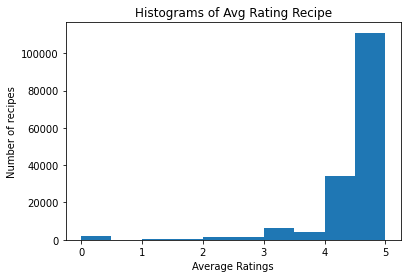

In [18]:
Merged_Data2.groupby('recipe_id')['rating'].mean().reset_index().rating.plot(kind ='hist',title='Histograms of Avg Rating Recipe')
plt.xlabel("Average Ratings")
plt.ylabel("Number of recipes")
plt.show()

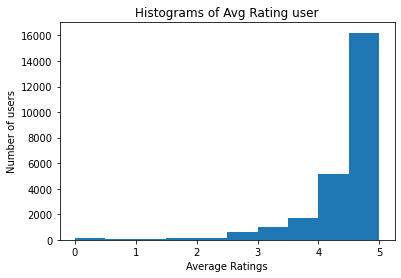

In [19]:
Merged_Data2.groupby('user_id')['rating'].mean().reset_index().rating.plot(kind ='hist',title='Histograms of Avg Rating user')
plt.xlabel("Average Ratings")
plt.ylabel("Number of users")
plt.show()

### Recipess with highest count of Rating

In [32]:
Merged_Data2['name'].value_counts()[0:20]

to die for crock pot roast                                    1091
crock pot chicken with black beans   cream cheese             1075
whatever floats your boat  brownies                            897
creamy cajun chicken pasta                                     894
kittencal s italian melt in your mouth meatballs               787
yes  virginia there is a great meatloaf                        758
jo mama s world famous spaghetti                               738
japanese mum s chicken                                         681
banana banana bread                                            677
oven fried chicken chimichangas                                666
kittencal s moist cheddar garlic oven fried chicken breast     655
creamy burrito casserole                                       629
best ever banana cake with cream cheese frosting               625
my family s favorite sloppy joes  pizza joes                   570
kittencal s 5 minute cinnamon flop brunch cake                

#### Bar Chart : 'to die for crock pot roast'                                   recipe has highest rating count of 1091

Text(0.5, 1.0, 'Bar Plot for Top 10 recipes')

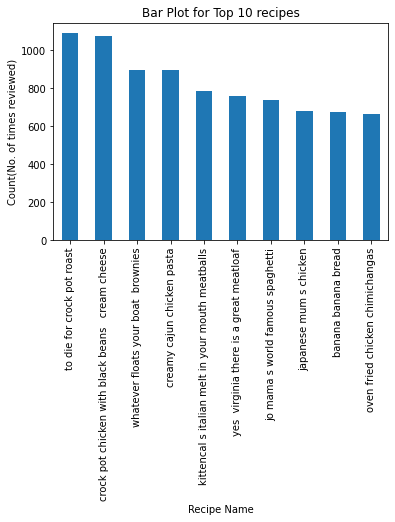

In [30]:
Merged_Data2['name'].value_counts()[0:10].plot.bar() 
plt.xlabel('Recipe Name')
plt.ylabel('Count(No. of times reviewed)')
plt.title('Bar Plot for Top 10 recipes')

### Users with highet number of rating given:

Text(0.5, 1.0, 'Highest count of Rating given by Users')

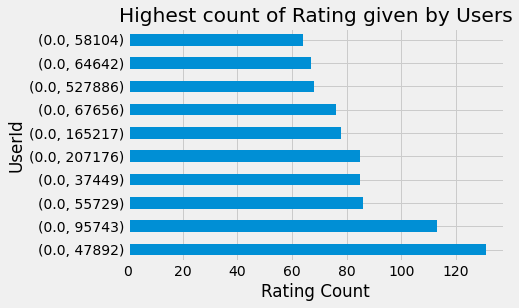

In [128]:
Merged_Data2.groupby('rating')['user_id'].value_counts()[0:10].plot.barh()
plt.xlabel('Rating Count')
plt.ylabel('UserId')
plt.title('Highest count of Rating given by Users')

- User Id: 47892 has rated 120 times

<AxesSubplot:>

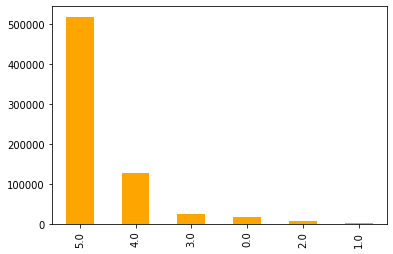

In [35]:
Merged_Data2['rating'].value_counts().plot.bar(color='Orange')

- Most of the recipes has rating of '5'

## Toy Dataset Generation

### Approach-1: Based on Cuisine

In [67]:
Interactions = pd.read_csv(Base_path+"/interactions_train.csv")
Recipes=pd.read_csv(Base_path+"/RAW_recipes.csv")

In [ ]:
Interactions.shape

(698901, 6)

In [68]:
Merged_Data2 = pd.merge(Recipes,Interactions, how="inner", left_on = 'id', right_on= 'recipe_id')
Merged_Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698901 entries, 0 to 698900
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            698901 non-null  object 
 1   id              698901 non-null  int64  
 2   minutes         698901 non-null  int64  
 3   contributor_id  698901 non-null  int64  
 4   submitted       698901 non-null  object 
 5   tags            698901 non-null  object 
 6   nutrition       698901 non-null  object 
 7   n_steps         698901 non-null  int64  
 8   steps           698901 non-null  object 
 9   description     684627 non-null  object 
 10  ingredients     698901 non-null  object 
 11  n_ingredients   698901 non-null  int64  
 12  user_id         698901 non-null  int64  
 13  recipe_id       698901 non-null  int64  
 14  date            698901 non-null  object 
 15  rating          698901 non-null  float64
 16  u               698901 non-null  int64  
 17  i         

In [60]:
# Check popular recipes
df=Merged_Data2.sort_values(by='rating', ascending=False).head()

In [61]:
df[['name','id','rating']]

,name,id,rating
0,arriba baked winter squash mexican style,137739,5.0
473591,moroccan spiced pumpkin couscous salad,222061,5.0
473628,moroccan style beef stew,357620,5.0
473629,moroccan style chicken,224920,5.0
473630,moroccan style chicken,224920,5.0


#### Pre-processing of the data
- column ingredients are read as strings by python rather than list objects.

-  convert ingredients to list objects so that we can use them as iterables while text processing.


In [69]:

Merged_Data2['ingredients']

0         ['winter squash', 'mexican seasoning', 'mixed ...
1         ['winter squash', 'mexican seasoning', 'mixed ...
2         ['winter squash', 'mexican seasoning', 'mixed ...
3         ['prepared pizza crust', 'sausage patty', 'egg...
4         ['prepared pizza crust', 'sausage patty', 'egg...
                                ...                        
698896    ['hard-cooked eggs', 'mayonnaise', 'dijon must...
698897    ['hard-cooked eggs', 'mayonnaise', 'dijon must...
698898    ['hard-cooked eggs', 'mayonnaise', 'dijon must...
698899    ['hard-cooked eggs', 'mayonnaise', 'dijon must...
698900    ['hard-cooked eggs', 'mayonnaise', 'dijon must...
Name: ingredients, Length: 698901, dtype: object

In [70]:
# Converting ingredients string to list of ingredients
Merged_Data2['ingredients'] = Merged_Data2['ingredients'].apply(eval)
Merged_Data2['ingredients'].head()


0    [winter squash, mexican seasoning, mixed spice...
1    [winter squash, mexican seasoning, mixed spice...
2    [winter squash, mexican seasoning, mixed spice...
3    [prepared pizza crust, sausage patty, eggs, mi...
4    [prepared pizza crust, sausage patty, eggs, mi...
Name: ingredients, dtype: object

In [71]:
# Converting ingredients list back to usable text strings
Merged_Data2['ingredients'] = [','.join(z).strip() for z in Merged_Data2['ingredients']]
Merged_Data2['ingredients'].head()

0    winter squash,mexican seasoning,mixed spice,ho...
1    winter squash,mexican seasoning,mixed spice,ho...
2    winter squash,mexican seasoning,mixed spice,ho...
3    prepared pizza crust,sausage patty,eggs,milk,s...
4    prepared pizza crust,sausage patty,eggs,milk,s...
Name: ingredients, dtype: object

In [72]:
# Feature Engineering Cuisine
train_Cuisines = pd.read_json(Base_path+'/train.json')
train_Cuisines.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


As we are dealing with textual data we have to vectorize ingreidents text.
For this we will use TF-IDF Vectorizer instad of count vectorizer as it will take into consideration the Frequency of words in document(TF) and also the frequency in all corpus documents(IDF)

In [73]:
train_Cuisines['ingredient_list'] = [','.join(z).strip() for z in train_Cuisines['ingredients']]

ingredients = train_Cuisines['ingredient_list']

Tfidfvectorizer = TfidfVectorizer(ngram_range=(1,2), min_df= 3, max_features = 1000, stop_words='english')

tfidf_dense_matrix= Tfidfvectorizer.fit_transform(ingredients).todense()
cuisines = train_Cuisines['cuisine']

print("TF-IDF Matrix looks like below :\n",tfidf_dense_matrix,"\n")
print("Cuisine looks like below :\n",cuisines.head(),"\n")

TF-IDF Matrix looks like below :
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

Cuisine looks like below :
 0          greek
1    southern_us
2       filipino
3         indian
4         indian
Name: cuisine, dtype: object 



#### Split data into training and testing

In [74]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_dense_matrix, cuisines, test_size=0.3)

In [85]:
X_train=np.asarray(X_train)
y_train=np.asarray(y_train)


#### train a logitic regression model to predict cuisine type

In [86]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

In [89]:
X_test=np.asarray(X_test)
y_test=np.asarray(y_test)

In [90]:
Test_pred = model.predict(X_test)

#### find accuracy

In [91]:
print("mtest set accuracy : ",accuracy_score(y_test, Test_pred))
cuisines = train_Cuisines['cuisine'].value_counts().index
print(classification_report(y_test, Test_pred, target_names=cuisines))

mtest set accuracy :  0.7451604793429984
              precision    recall  f1-score   support

     italian       0.62      0.32      0.42       130
     mexican       0.49      0.19      0.28       272
 southern_us       0.81      0.69      0.75       478
      indian       0.74      0.84      0.79       790
     chinese       0.69      0.54      0.61       231
      french       0.52      0.55      0.53       795
cajun_creole       0.78      0.64      0.71       341
        thai       0.84      0.90      0.87       902
    japanese       0.53      0.30      0.38       185
       greek       0.74      0.88      0.80      2387
     spanish       0.88      0.59      0.71       172
      korean       0.78      0.55      0.64       432
  vietnamese       0.76      0.67      0.71       253
    moroccan       0.88      0.92      0.90      1895
     british       0.84      0.68      0.75       242
    filipino       0.62      0.34      0.44       123
       irish       0.64      0.78      0

In [92]:

#Vectorize ingredients based on previously fitted Tfidfvectorizer
ingredients_matrix = Tfidfvectorizer.transform(Merged_Data2['ingredients'])


#Use previously created randomforest model trained on cuisine data
cuisines_for_ingredients = model.predict(ingredients_matrix)


#Create new cuisine column in original dataframe
Merged_Data2['cuisine'] = cuisines_for_ingredients
Merged_Data2.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,u,i,cuisine
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"winter squash,mexican seasoning,mixed spice,ho...",7,4470,137739,2006-02-18,5.0,100,145702,mexican
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"winter squash,mexican seasoning,mixed spice,ho...",7,593927,137739,2010-08-21,5.0,357,145702,mexican
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"winter squash,mexican seasoning,mixed spice,ho...",7,178427,137739,2011-12-05,5.0,651,145702,mexican
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"prepared pizza crust,sausage patty,eggs,milk,s...",6,28603,31490,2002-08-19,0.0,8582,33090,italian
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"prepared pizza crust,sausage patty,eggs,milk,s...",6,319943,31490,2009-07-18,4.0,1960,33090,italian


In [93]:
# Which cusine have average highest Ratings?
DataFrameVis = Merged_Data2.groupby('cuisine')['rating'].agg(['mean','count'])\
                                                        .rename(columns={"mean": "average_rating", "count": "No_of_Reviews"})
DataFrameVis.reset_index(inplace=True)    

In [94]:
DataFrameVis.sort_values(by=['average_rating','No_of_Reviews'], ascending= False) 

,cuisine,average_rating,No_of_Reviews
6,greek,4.649457,15282
17,spanish,4.608752,4593
5,french,4.602419,45304
9,italian,4.587529,173491
15,russian,4.586058,9970
2,cajun_creole,4.581296,10960
0,brazilian,4.578117,3738
14,moroccan,4.570068,6722
16,southern_us,4.569363,234346
12,korean,4.568466,3279


- southern_us	has highest count of rating, and Italian hass 2nd highest count of rating

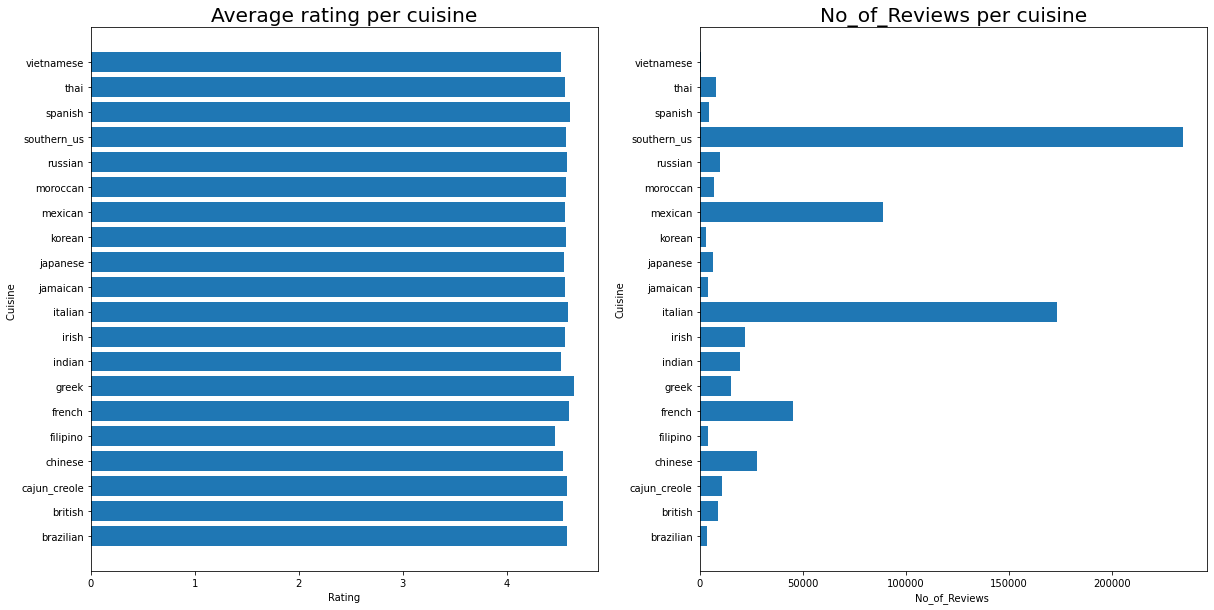

In [95]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
plt.style.use('fivethirtyeight')
ax1.barh(y= DataFrameVis['cuisine'], width= DataFrameVis['average_rating'])
ax1.set(xlabel='Rating', ylabel='Cuisine ',title="Average rating per cuisine")


ax2.barh( y= DataFrameVis['cuisine'], width=DataFrameVis['No_of_Reviews'])
ax2.set(ylabel='Cuisine', xlabel='No_of_Reviews ',title="No_of_Reviews per cuisine")

plt.show()


In [96]:
DataFrameVis 

,cuisine,average_rating,No_of_Reviews
0,brazilian,4.578117,3738
1,british,4.539339,9113
2,cajun_creole,4.581296,10960
3,chinese,4.540241,27932
4,filipino,4.464083,4051
5,french,4.602419,45304
6,greek,4.649457,15282
7,indian,4.528499,19790
8,irish,4.566233,21968
9,italian,4.587529,173491


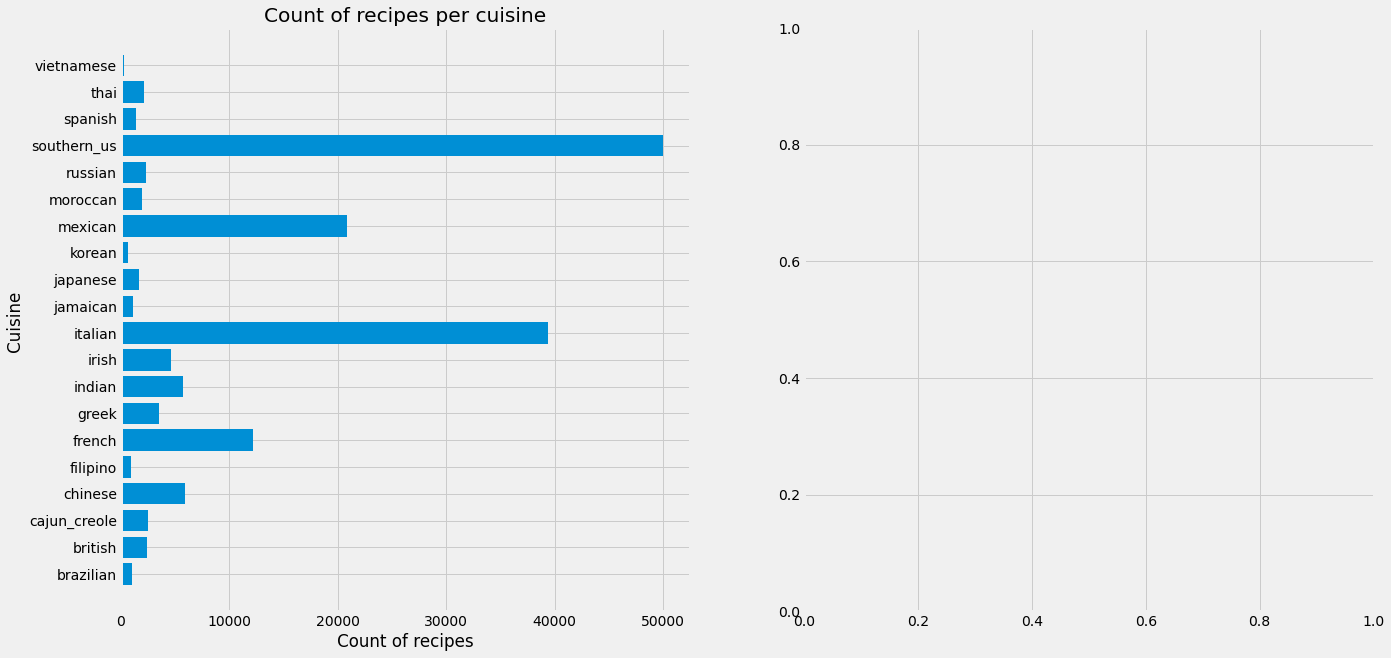

In [112]:

DataFrameVis = Merged_Data2.groupby('cuisine')['recipe_id'].nunique()
DataFrameVis = pd.DataFrame(DataFrameVis)
DataFrameVis.reset_index(inplace=True)


fig ,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plt.style.use('fivethirtyeight')
ax1.barh(y= DataFrameVis['cuisine'], width= DataFrameVis['recipe_id'])
ax1.set(xlabel='Count of recipes', ylabel='Cuisine ',title="Count of recipes per cuisine")
plt.show()

In [113]:
Cuisine_data=Merged_Data2

In [114]:
Cuisine_data

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,u,i,cuisine
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"winter squash,mexican seasoning,mixed spice,ho...",7,4470,137739,2006-02-18,5.0,100,145702,mexican
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"winter squash,mexican seasoning,mixed spice,ho...",7,593927,137739,2010-08-21,5.0,357,145702,mexican
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"winter squash,mexican seasoning,mixed spice,ho...",7,178427,137739,2011-12-05,5.0,651,145702,mexican
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"prepared pizza crust,sausage patty,eggs,milk,s...",6,28603,31490,2002-08-19,0.0,8582,33090,italian
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"prepared pizza crust,sausage patty,eggs,milk,s...",6,319943,31490,2009-07-18,4.0,1960,33090,italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698896,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","hard-cooked eggs,mayonnaise,dijon mustard,salt...",8,428885,308080,2008-10-09,5.0,242,99036,cajun_creole
698897,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","hard-cooked eggs,mayonnaise,dijon mustard,salt...",8,28177,308080,2009-10-05,5.0,461,99036,cajun_creole
698898,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","hard-cooked eggs,mayonnaise,dijon mustard,salt...",8,128473,308080,2009-10-06,5.0,208,99036,cajun_creole
698899,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","hard-cooked eggs,mayonnaise,dijon mustard,salt...",8,226863,308080,2009-10-11,5.0,267,99036,cajun_creole


- filtered data with Italian cuisine due to its worldwide popularity 

In [115]:
Italian_df = Cuisine_data[Cuisine_data['cuisine'].apply(lambda x: 'italian' in x)]

In [116]:
Italian_df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,u,i,cuisine
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"prepared pizza crust,sausage patty,eggs,milk,s...",6,28603,31490,2002-08-19,0.0,8582,33090,italian
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"prepared pizza crust,sausage patty,eggs,milk,s...",6,319943,31490,2009-07-18,4.0,1960,33090,italian
5,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"prepared pizza crust,sausage patty,eggs,milk,s...",6,674022,31490,2011-04-10,5.0,5110,33090,italian
57,cream of spinach soup vegan,24701,55,3288,2002-04-08,"['60-minutes-or-less', 'time-to-make', 'course...","[64.8, 3.0, 13.0, 54.0, 4.0, 2.0, 3.0]",10,"['in a 3 qt saucepan over medium high heat , s...",thickened with a mix of cooked oats and vegies...,"onion,scallion,apple juice,olive oil,spinach,f...",12,10678,24701,2002-04-18,2.0,12145,93303,italian
58,cream of spinach soup vegan,24701,55,3288,2002-04-08,"['60-minutes-or-less', 'time-to-make', 'course...","[64.8, 3.0, 13.0, 54.0, 4.0, 2.0, 3.0]",10,"['in a 3 qt saucepan over medium high heat , s...",thickened with a mix of cooked oats and vegies...,"onion,scallion,apple juice,olive oil,spinach,f...",12,92796,24701,2006-09-03,2.0,2072,93303,italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698887,zwiebelsuppe clear german onion soup,61748,35,27783,2003-05-08,"['60-minutes-or-less', 'time-to-make', 'course...","[252.0, 17.0, 21.0, 44.0, 21.0, 14.0, 7.0]",10,"['heat oil in a large pot', 'saute garlic slic...",this is very different from french onion soup....,"onions,red onions,fresh garlic,olive oil,fresh...",11,52282,61748,2004-01-14,5.0,829,90082,italian
698888,zwiebelsuppe clear german onion soup,61748,35,27783,2003-05-08,"['60-minutes-or-less', 'time-to-make', 'course...","[252.0, 17.0, 21.0, 44.0, 21.0, 14.0, 7.0]",10,"['heat oil in a large pot', 'saute garlic slic...",this is very different from french onion soup....,"onions,red onions,fresh garlic,olive oil,fresh...",11,4470,61748,2004-05-19,5.0,100,90082,italian
698889,zwiebelsuppe clear german onion soup,61748,35,27783,2003-05-08,"['60-minutes-or-less', 'time-to-make', 'course...","[252.0, 17.0, 21.0, 44.0, 21.0, 14.0, 7.0]",10,"['heat oil in a large pot', 'saute garlic slic...",this is very different from french onion soup....,"onions,red onions,fresh garlic,olive oil,fresh...",11,95743,61748,2004-10-27,5.0,552,90082,italian
698891,zydeco salad,367912,5,79877,2009-04-25,"['15-minutes-or-less', 'time-to-make', 'prepar...","[14.1, 0.0, 8.0, 0.0, 1.0, 0.0, 1.0]",4,['place the lettuce on a platter or serving di...,"recipe courtesy of b&c seafood, vacherie, la a...","iceberg lettuce,tomatoes,3 bean mix,olive salad",4,226863,367912,2009-06-12,5.0,267,102022,italian


In [117]:
Italian_df.shape

(173491, 19)

In [118]:
data=Italian_df

-  We have not use this approach as Italian Cuisine's prediction accuracy is low

### Approach-2: Based on cooking time

In [46]:
Recipes=pd.read_csv(Base_path+"/RAW_recipes.csv")

#### convert prepration time to different classes

In [37]:
def recipe_time(min):
    if 0 <= min <= 20:
        return 'Quick'
    if 30 < min <= 60:
        return 'Moderate'
    if 60 < min <= 120:
        return 'Long'

    return 'Very Long'

In [41]:
Recipes['minutes'].value_counts()

Moderate     70077
Very Long    63031
Quick        61846
Long         36683
Name: minutes, dtype: int64

Text(0.5, 1.0, 'Plot of Categories of Time taken to prepare food items')

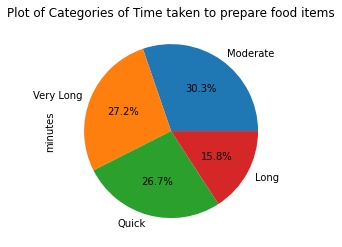

In [43]:
Recipes['minutes'].value_counts()[0:5].plot.pie(autopct='%1.1f%%')
plt.title('Plot of Categories of Time taken to prepare food items')

- 26.7% recipes are quick recipes, with preparation time less than 20 minutes 

Text(0.5, 1.0, 'Time taken to prepare food items')

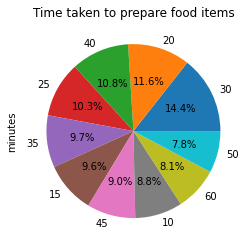

In [48]:
Recipes['minutes'].value_counts()[0:10].plot.pie(autopct='%1.1f%%')
plt.title('Time taken to prepare food items')

In [ ]:
df = Recipes[Recipes['minutes']<=20]

In [ ]:
Interactions = pd.read_csv(Base_path+"/interactions_train.csv")

In [ ]:
Merged_Data2 = pd.merge(Recipes,Interactions, how="inner", left_on = 'id', right_on= 'recipe_id')
Merged_Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698901 entries, 0 to 698900
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            698901 non-null  object 
 1   id              698901 non-null  int64  
 2   minutes         698901 non-null  int64  
 3   contributor_id  698901 non-null  int64  
 4   submitted       698901 non-null  object 
 5   tags            698901 non-null  object 
 6   nutrition       698901 non-null  object 
 7   n_steps         698901 non-null  int64  
 8   steps           698901 non-null  object 
 9   description     684627 non-null  object 
 10  ingredients     698901 non-null  object 
 11  n_ingredients   698901 non-null  int64  
 12  user_id         698901 non-null  int64  
 13  recipe_id       698901 non-null  int64  
 14  date            698901 non-null  object 
 15  rating          698901 non-null  float64
 16  u               698901 non-null  int64  
 17  i         

#### choose recipe with less than 20 min preparation time

In [ ]:
df = Merged_Data2[Merged_Data2['minutes']<=20]

In [ ]:
df.shape

(171931, 18)

In [ ]:
df2 = df[['name','user_id','recipe_id','rating','minutes']]

In [ ]:
df2

,name,user_id,recipe_id,rating,minutes
7,apple a day milk shake,6357,5289,5.0,0
8,apple a day milk shake,192972,5289,5.0,0
21,calm your nerves tonic,65056,39959,5.0,5
76,homemade vegetable soup from a can,189616,87098,5.0,12
77,homemade vegetable soup from a can,369715,87098,4.0,12
...,...,...,...,...,...
698890,zydeco green beans,283251,185979,0.0,20
698891,zydeco salad,226863,367912,5.0,5
698892,zydeco salad,621626,367912,5.0,5
698893,zydeco sauce,865936,357451,5.0,15


In [ ]:
df = df2[df2['minutes']!=0]

In [ ]:
df

,name,user_id,recipe_id,rating,minutes
21,calm your nerves tonic,65056,39959,5.0,5
76,homemade vegetable soup from a can,189616,87098,5.0,12
77,homemade vegetable soup from a can,369715,87098,4.0,12
170,i stole the idea from mirj sesame noodles,49304,90921,5.0,18
171,i stole the idea from mirj sesame noodles,82648,90921,5.0,18
...,...,...,...,...,...
698890,zydeco green beans,283251,185979,0.0,20
698891,zydeco salad,226863,367912,5.0,5
698892,zydeco salad,621626,367912,5.0,5
698893,zydeco sauce,865936,357451,5.0,15


In [ ]:
df.to_csv('short-recipes-20.csv')

- finalize this toy dataset for further operations 